In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [19]:
df = pd.read_csv("Titanic_Train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

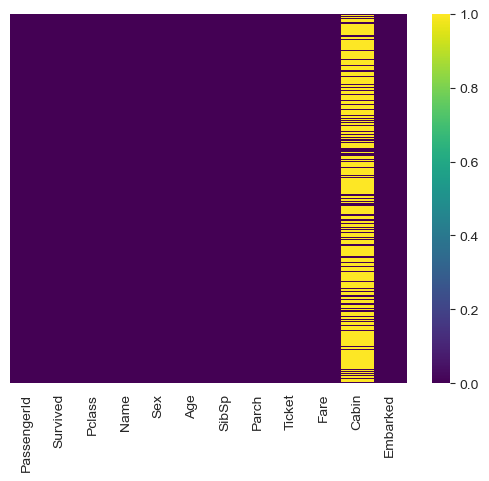

In [48]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.show()

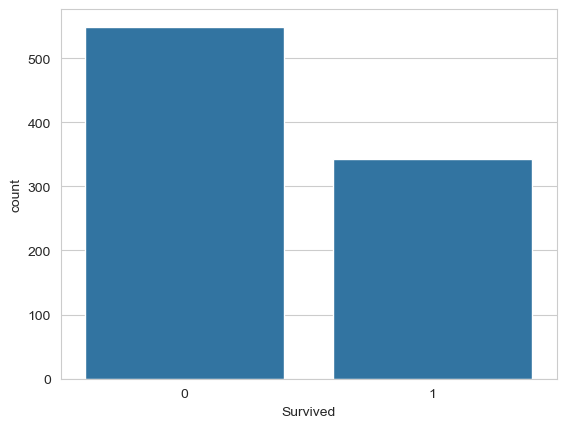

In [25]:
sns.countplot(x='Survived', data=df)
plt.show()

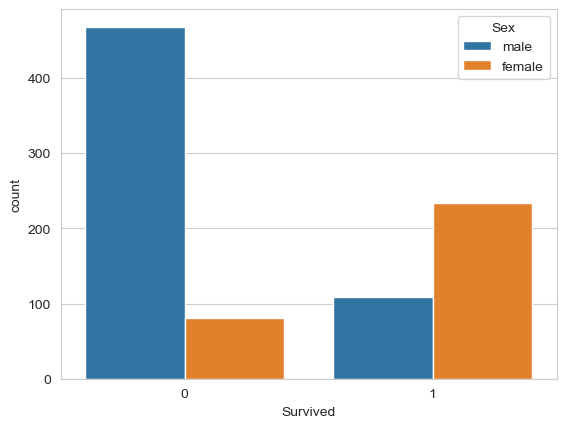

In [27]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

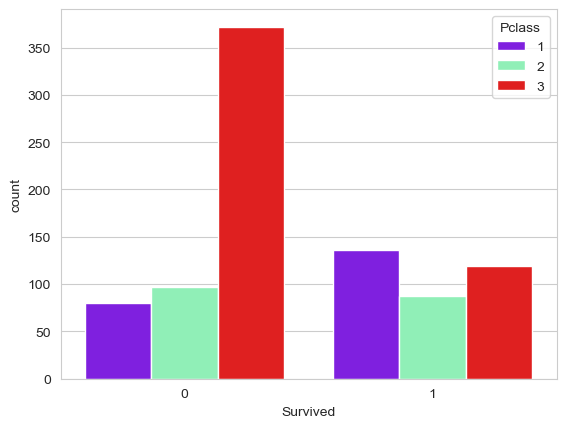

In [29]:
sns.countplot(x='Survived', hue='Pclass', palette='rainbow', data=df)
plt.show()

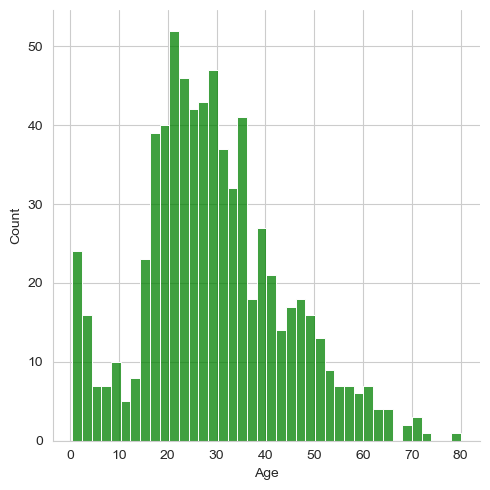

In [31]:
sns.displot(df['Age'].dropna(), kde=False, color='green', bins=40)
plt.show()

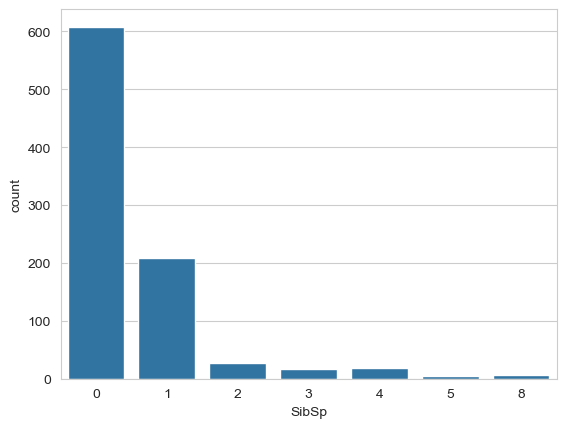

In [33]:
sns.countplot(x='SibSp', data=df)
plt.show()

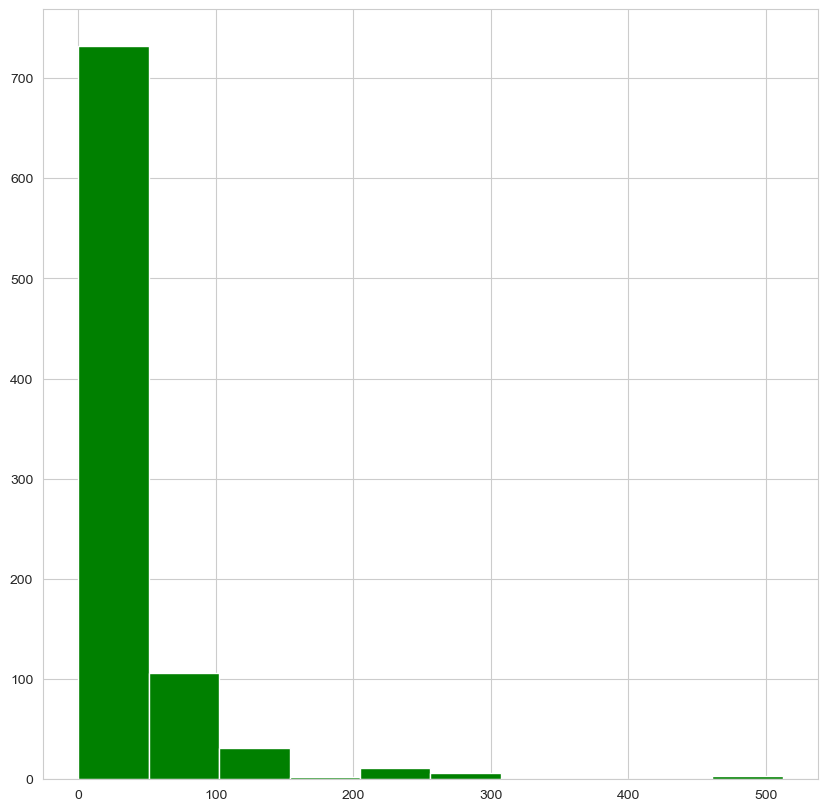

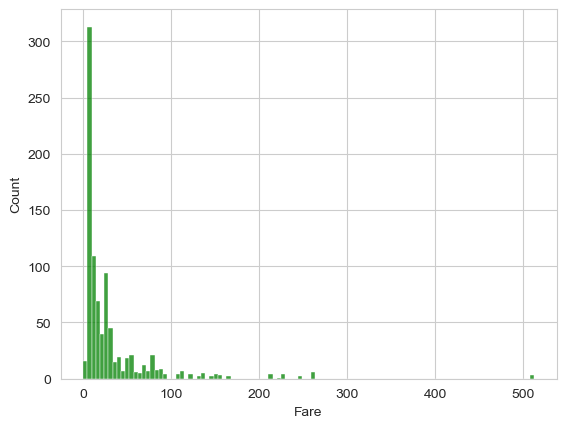

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [35]:
df['Fare'].hist(figsize=(10,10), color='green')
plt.show()

sns.histplot(df['Fare'], kde=False, color='green')
plt.show()

df['Fare'].value_counts()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


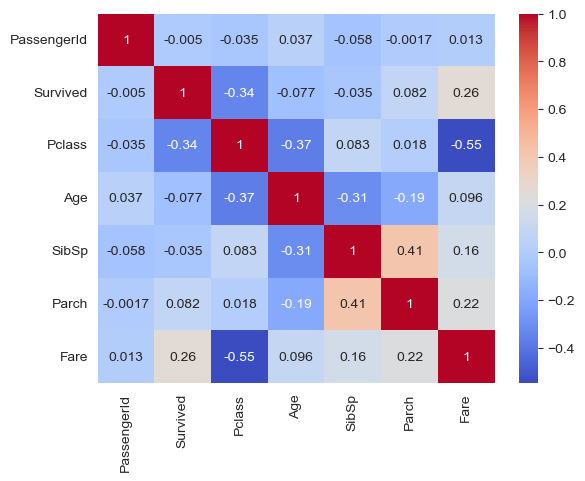

In [37]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

print(numeric_df.corr())  # Display the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

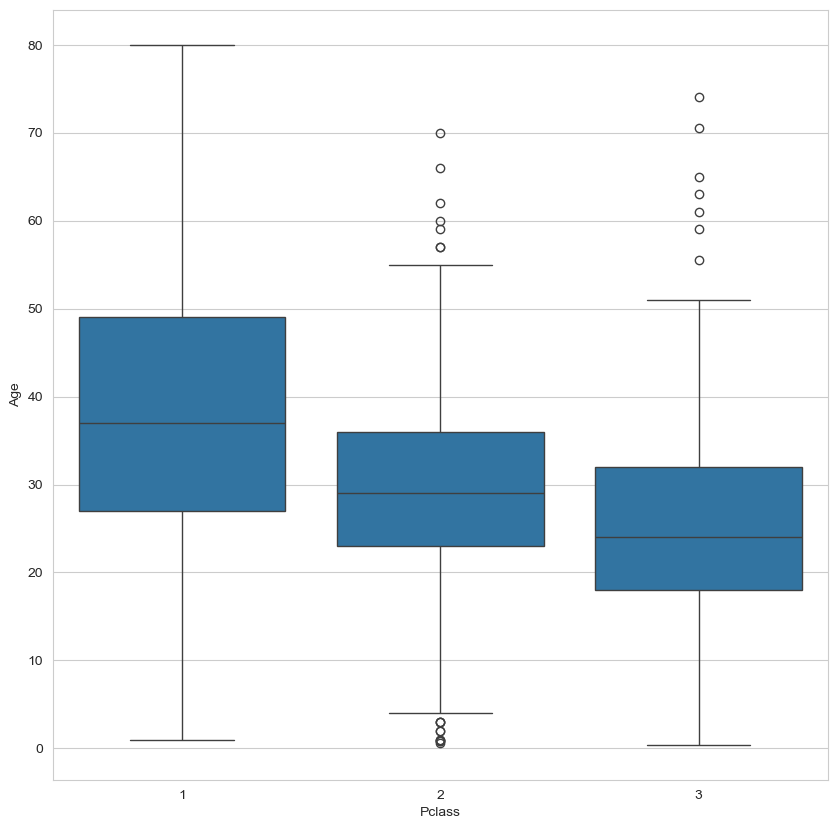

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

C:\Users\Lacuesta\AppData\Local\Temp\ipykernel_17284\2878421008.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = col[0]
C:\Users\Lacuesta\AppData\Local\Temp\ipykernel_17284\2878421008.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = col[1]


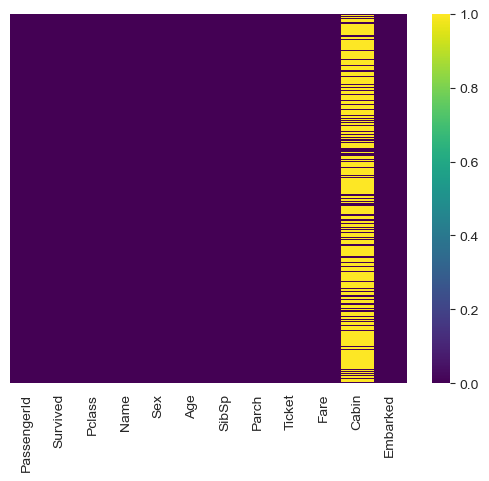

In [41]:
def age_impute(col):
    Age = col[0]
    Pclass = col[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

df['Age'] = df[['Age', 'Pclass']].apply(age_impute, axis=1)

sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.show()

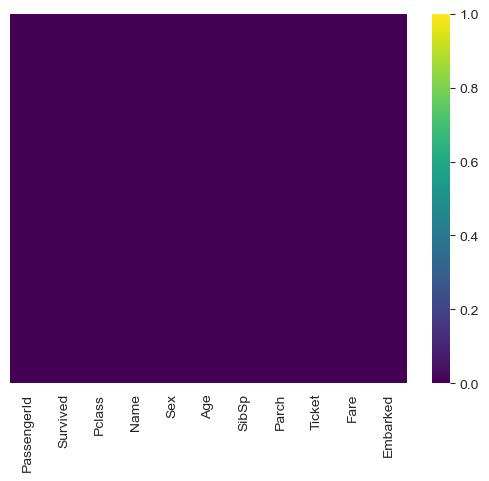

Survived
0    549
1    342
Name: count, dtype: int64


In [43]:
ddf = df.drop('Cabin', axis=1)

sns.heatmap(ddf.isnull(), yticklabels=False, cmap='viridis')
plt.show()

embark = pd.get_dummies(ddf['Embarked'], drop_first=True)
sex = pd.get_dummies(ddf['Sex'], drop_first=True)

ddf.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

ddf = pd.concat([ddf, sex, embark], axis=1)

print(ddf['Survived'].value_counts())

In [50]:
x = ddf.drop(['Survived'], axis=1)
y = ddf['Survived']

sm = SMOTE(sampling_strategy='auto')
x_res, y_res = sm.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

prediction = logmodel.predict(x_test)

accuracy = confusion_matrix(y_test, prediction)
print(accuracy)

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[125  29]
 [ 43 133]]
Accuracy: 78.18%


C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
